<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/FIN_Y_FTC_Casa_de_Bolsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

Saving Valor de la Unidad.xlsx to Valor de la Unidad.xlsx


In [ ]:
FIN = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FIN")

In [ ]:
FTC = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FTC")

In [ ]:
FIN['Fecha'] = pd.to_datetime(FIN['Fecha'])
FTC['Fecha'] = pd.to_datetime(FTC['Fecha'])

In [ ]:
FIN.set_index('Fecha', inplace=True)
FTC.set_index('Fecha', inplace=True)

In [ ]:
FIN.head()

In [ ]:
FTC.head()

Text(0.5, 0, 'Fecha')

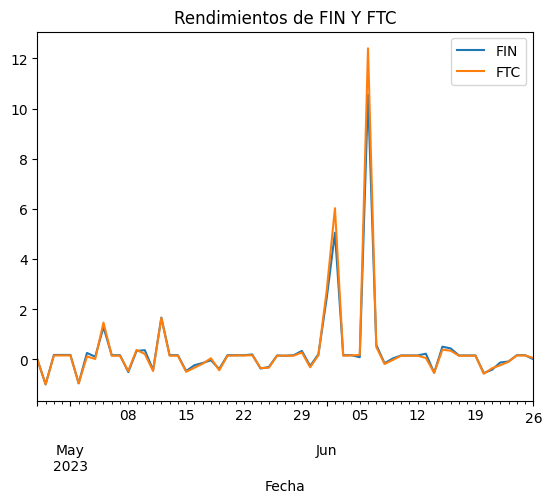

In [ ]:
FIN['Rentab Diaria'].plot()
FTC['Rentab Diaria'].plot()
plt.title('Rendimientos de FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')  # Rango de fechas mensuales
plt.legend(['FIN',"FTC"])
plt.xlabel('Fecha')

In [ ]:
descripcion_RENDIMIENTOSFIN = FIN['Rentab Diaria'].describe()
descripcion_RENDIMIENTOSFIN

count    61.000000
mean      0.356393
std       1.557319
min      -0.990000
25%      -0.120000
50%       0.160000
75%       0.180000
max      10.560000
Name: Rentab Diaria, dtype: float64

In [ ]:
descripcion_RENDIMIENTOSFTC = FTC['Rentab Diaria'].describe()
descripcion_RENDIMIENTOSFTC

count    61.000000
mean      0.386066
std       1.820793
min      -0.990000
25%      -0.170000
50%       0.150000
75%       0.160000
max      12.400000
Name: Rentab Diaria, dtype: float64

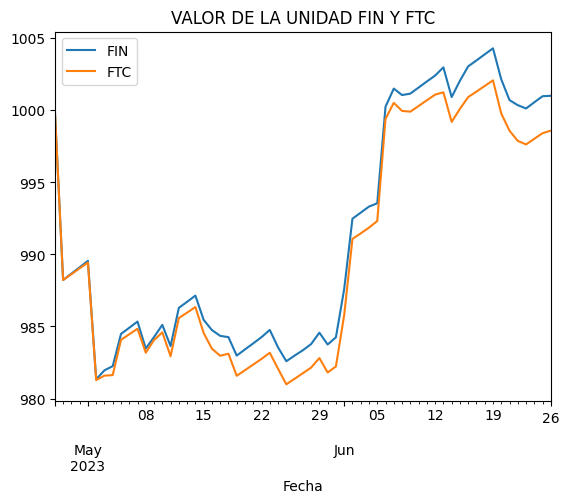

In [ ]:
FIN["Valor Unidad"].plot()
FTC["Valor Unidad"].plot()
plt.title('VALOR DE LA UNIDAD FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')
plt.legend(['FIN',"FTC"])

In [ ]:
descripcion_VUFIN = FIN['Valor Unidad'].describe()
descripcion_VUFIN

count      61.000000
mean      991.396885
std         8.194929
min       981.340000
25%       984.260000
50%       987.590000
75%      1000.900000
max      1004.280000
Name: Valor Unidad, dtype: float64

In [ ]:
descripcion_VUFTC = FTC['Valor Unidad'].describe()
descripcion_VUFTC

count      61.000000
mean      990.104426
std         7.871601
min       980.990000
25%       982.940000
50%       986.350000
75%       999.180000
max      1002.060000
Name: Valor Unidad, dtype: float64

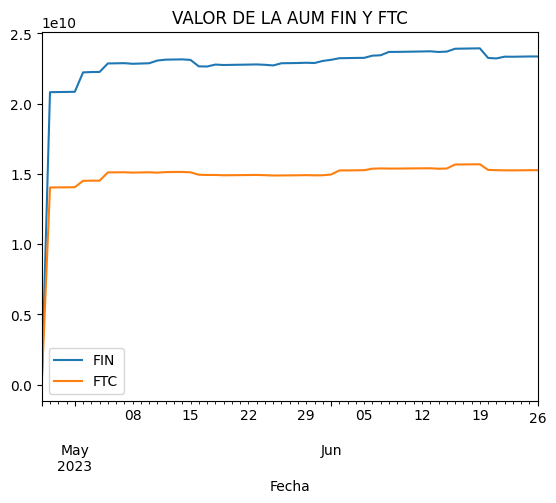

In [ ]:
FIN['Valor Fondo'].plot()
FTC['Valor Fondo'].plot()
plt.title('VALOR DE LA AUM FIN Y FTC')
plt.legend(['FIN',"FTC"])

In [ ]:
FIN['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

Fecha
2023-06-22    23,339,611,416,23
2023-06-23    23,334,248,578,34
2023-06-24    23,344,163,875,52
2023-06-25    23,354,065,798,74
2023-06-26    23,354,749,650,47
Name: Valor Fondo, dtype: object

In [ ]:
FTC['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

Fecha
2023-06-22    15,253,088,729,62
2023-06-23    15,249,322,992,45
2023-06-24    15,255,354,161,62
2023-06-25    15,261,384,790,34
2023-06-26    15,263,984,389,26
Name: Valor Fondo, dtype: object

In [ ]:
nivel_confianza = 0.95

In [ ]:
FIN['Valor Unidad'].head()

Fecha
2023-04-27    1000.00
2023-04-28     988.22
2023-04-29     988.66
2023-04-30     989.10
2023-05-01     989.55
Name: Valor Unidad, dtype: float64

In [ ]:
FIN['Rentab Diaria'].head()

Fecha
2023-04-27    0.00
2023-04-28   -0.99
2023-04-29    0.18
2023-04-30    0.18
2023-05-01    0.18
Name: Rentab Diaria, dtype: float64

In [ ]:
Retorno_FTC = FTC['Valor Fondo']*FTC['Rentab Diaria']
Retorno_FTC.head()

Fecha
2023-04-27    0.000000e+00
2023-04-28   -1.389318e+10
2023-04-29    2.246273e+09
2023-04-30    2.247185e+09
2023-05-01    2.248097e+09
dtype: float64

In [ ]:
Retorno_FIN = FIN['Valor Fondo']*FIN['Rentab Diaria']
Retorno_FIN.head()

Fecha
2023-04-27    0.000000e+00
2023-04-28   -2.060431e+10
2023-04-29    3.747903e+09
2023-04-30    3.749577e+09
2023-05-01    3.751251e+09
dtype: float64

In [ ]:
var_FTC = np.percentile(Retorno_FTC, (1 - nivel_confianza) * 100)

In [ ]:
historico_var_FTC = []
for p in range(1, 101):
    percentil = np.percentile(Retorno_FTC, p)
    historico_var_FTC.append(percentil)
print(historico_var_FTC)

[-13825761376.343819, -12766810794.479057, -9724797356.892738, -8484460700.325099, -8144962434.2668, -7700879484.40486, -7312222817.562679, -7034418716.76002, -6941128358.949881, -6940094872.636001, -6620470567.71874, -6194386872.09082, -5555384395.041579, -5232972471.18614, -5068855823.9276, -4985794320.88544, -4926632033.9676, -4915268179.298401, -4793943055.9572, -4617637298.28, -3951981163.9995604, -3360234933.5210805, -2916308510.6465197, -2675691788.5732, -2536729916.9005003, -1838155408.3524985, -1159466677.929157, -520549503.75513923, -184546267.41828042, 0.0, 174221510.69256037, 381535779.5775796, 655035564.8475204, 814056921.3047403, 915839063.3556, 920713204.6567199, 1087596906.0002394, 1578499727.4285605, 1938623277.3384008, 2233357191.489, 2233883853.0147, 2234410553.4363, 2234937331.6496997, 2235474654.0417, 2236017248.523, 2242170668.18328, 2246455453.78432, 2247002971.26688, 2247550171.46816, 2248097213.0288, 2259177054.66962, 2266742326.0442996, 2267278456.8867, 226848

In [ ]:
var_FIN = np.percentile(Retorno_FIN, (1 - nivel_confianza) * 100)

In [ ]:
historico_var_FIN = []
for p in range(1, 101):
    percentil = np.percentile(Retorno_FIN, p)
    historico_var_FIN.append(percentil)
print(historico_var_FIN)

[-20806722967.68618, -18994316473.4562, -14164349329.107903, -12551552152.81712, -12547339960.5551, -11869113699.63404, -11259530162.56748, -10787232073.20992, -10252904397.97092, -9687561929.7912, -9586049775.0609, -9343466895.04392, -8818742564.453579, -8463911573.700959, -8194027252.8672, -7366640997.50928, -6642201159.691959, -6123654156.955841, -5654307155.17104, -5209560153.8619, -4214787682.9302607, -3475206156.01808, -3246006517.14482, -3022065330.4912806, -2800753369.9476, -2240345279.7393584, -1630050950.8623767, -919984144.6479192, -409977125.545861, 0.0, 140128497.90282035, 376277466.21879953, 804467375.3611006, 1405487734.2140427, 2092923317.9223, 2305868996.800619, 2644655534.344199, 3235123789.218301, 3522912023.3742805, 3659360247.1712, 3712486183.7591596, 3748238236.1581197, 3749242520.17908, 3750246688.60044, 3751250799.222, 3774719328.4833603, 3790680106.9024005, 3791625383.6368, 3792571163.05792, 3793517193.8224, 3813133206.82144, 3826528039.8083205, 3827480512.7708

# **VaR FTC**

In [ ]:
var_formatted = "{:,.2f}".format(var_FTC).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -8.144.962.434,27


# **VaR FIN**

In [ ]:
var_formatted = "{:,.2f}".format(var_FIN).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -12.547.339.960,56


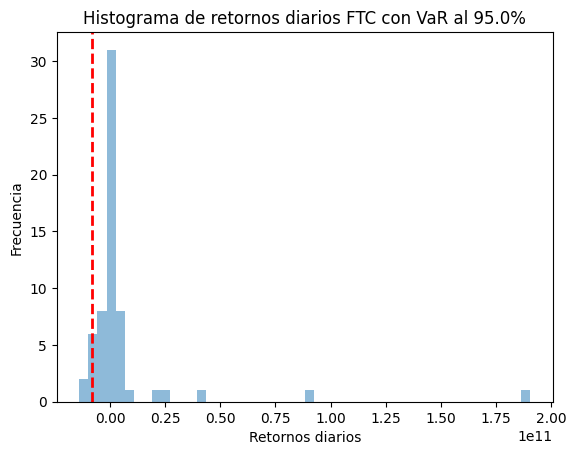

In [ ]:
plt.hist(Retorno_FTC , bins=50, alpha=0.5)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-32-c9d723731fc9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Retorno_FTC, shade=True)


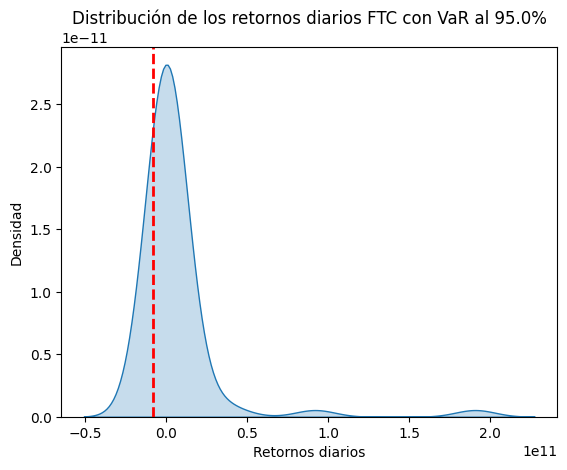

In [ ]:
sns.kdeplot(Retorno_FTC, shade=True)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

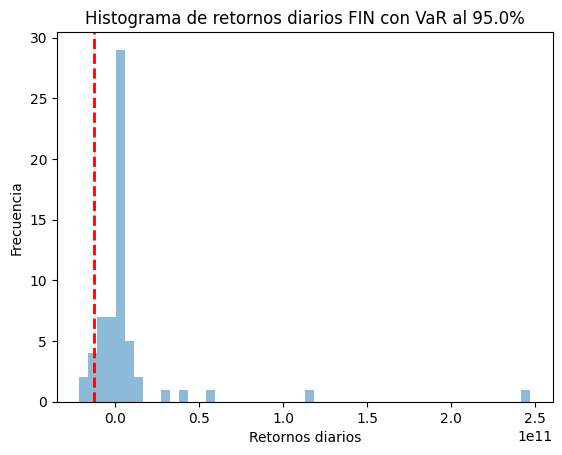

In [ ]:
plt.hist(Retorno_FIN , bins=50, alpha=0.5)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-202-f91fb862fd29>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Retorno_FIN, shade=True)


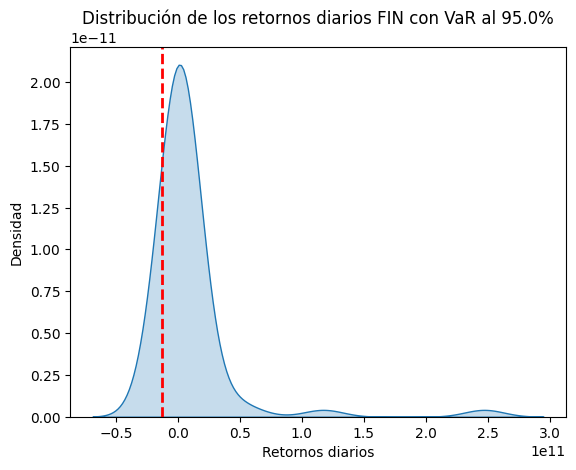

In [202]:
sns.kdeplot(Retorno_FIN, shade=True)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

<ipython-input-213-9560f568c937>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Retorno_FTC, shade=True)
<ipython-input-213-9560f568c937>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Retorno_FIN, shade=True)


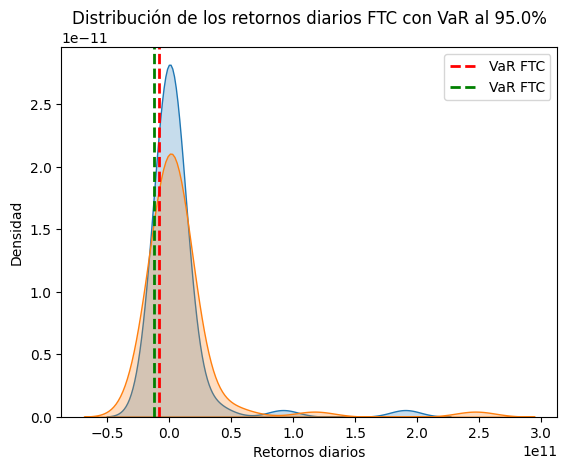

In [213]:
# Gráfico 1 - Retorno_FTC
sns.kdeplot(Retorno_FTC, shade=True)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2,label='VaR FTC')
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
# Gráfico 2 - Retorno_FIN
sns.kdeplot(Retorno_FIN, shade=True)
plt.axvline(x=var_FIN, color='g', linestyle='--', linewidth=2,label='VaR FTC')
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.legend()
plt.show()

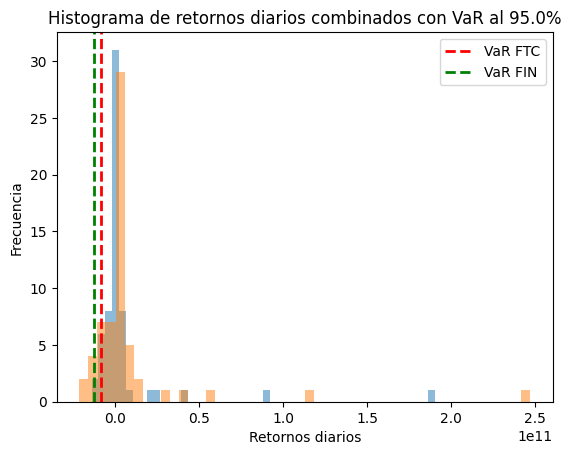

In [212]:
plt.hist(Retorno_FTC , bins=50, alpha=0.5)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2 ,label='VaR FTC')
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
# Gráfico 2 - Retorno_FIN
plt.hist(Retorno_FIN , bins=50, alpha=0.5)
plt.axvline(x=var_FIN, color='g', linestyle='--', linewidth=2, label='VaR FIN')
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios combinados con VaR al {}%'.format(nivel_confianza * 100))
plt.legend()
# Mostrar los gráficos combinados
plt.show()

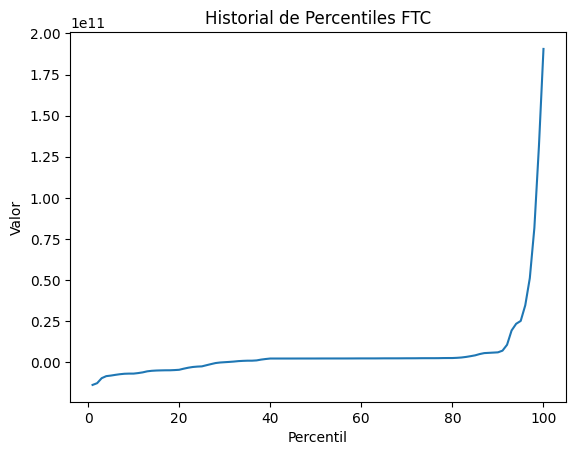

In [ ]:
x = np.arange(1, 101)
plt.plot(x, historico_var_FTC)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Historial de Percentiles FTC')
plt.show()

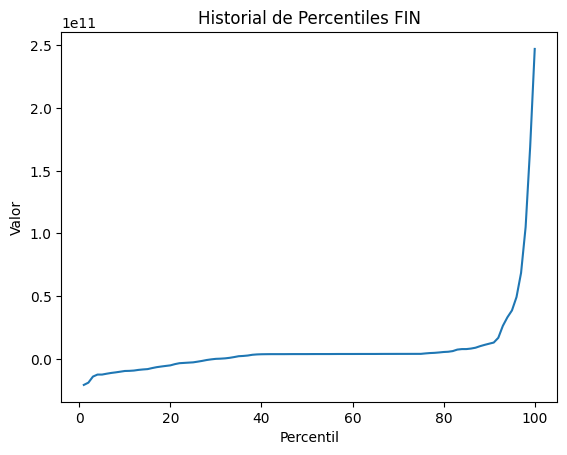

In [ ]:
x = np.arange(1, 101)
plt.plot(x, historico_var_FIN)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Historial de Percentiles FIN')
plt.show()

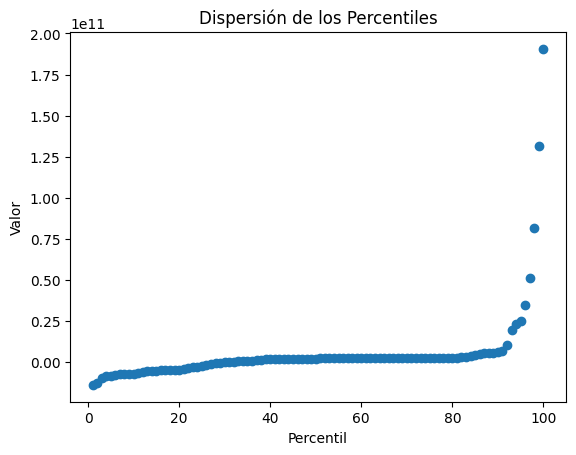

In [ ]:
x = range(1, 101)
plt.scatter(x, historico_var_FTC)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Dispersión de los Percentiles')
plt.show()

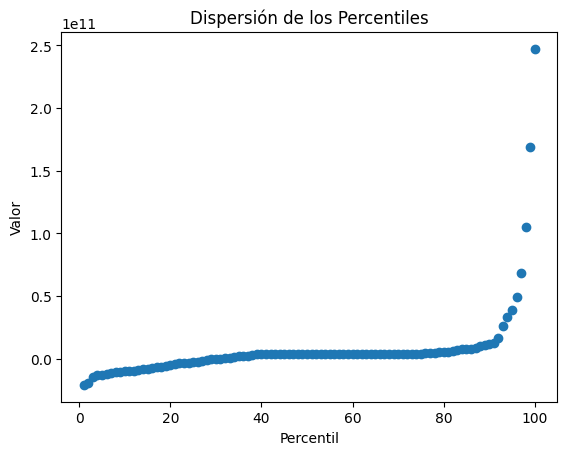

In [ ]:
x = range(1, 101)
plt.scatter(x, historico_var_FIN)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Dispersión de los Percentiles')
plt.show()

# **Composición Dinamica**

In [ ]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

In [ ]:
FIN.head()

In [167]:
FIN = pd.read_excel("/content/FIN Formato portafolio diario para envío.xlsx")

In [168]:
Composicion = pd.pivot_table(FIN, values='Valor Presente', index='Fecha', columns='Tasa Indexada', aggfunc=np.sum, margins=True, margins_name='Total') \
    .rename(columns={'NO': 'Acciones', 'No Tiene': 'Liquidez'}) \
    .drop(index=['Total']) \
    .style.format('{:,.2f}'.format)

In [ ]:
Composicion = Composicion.data
Composicion.fillna(0, inplace=True)
corr_matrix=Composicion.corr()

In [ ]:
Composicion_tail=Composicion.tail()

In [ ]:
Composicion_tail.style.format('{:,.2f}'.format)

Tasa Indexada,FS,IB1,IPC,Acciones,Liquidez,Total
Fecha,,,,,,
2023-06-22 00:00:00,"10,643,672,300.00","2,401,362,000.00","6,085,950,000.00","3,822,075,172.40","400,549,103.82","23,353,608,576.22"
2023-06-23 00:00:00,"10,660,310,200.00","2,402,830,000.00","6,087,290,000.00","3,797,700,914.00","400,760,087.97","23,348,891,201.97"
2023-06-24 00:00:00,"10,663,951,650.00","2,403,874,000.00","6,090,050,000.00","3,800,436,563.72","400,760,087.97","23,359,072,301.69"
2023-06-25 00:00:00,"10,667,566,600.00","2,404,911,000.00","6,092,810,000.00","3,803,192,452.42","400,760,087.97","23,369,240,140.39"
2023-06-26 00:00:00,"10,653,039,500.00","2,405,910,000.00","6,101,660,000.00","3,825,683,096.00","383,749,924.40","23,370,042,520.40"


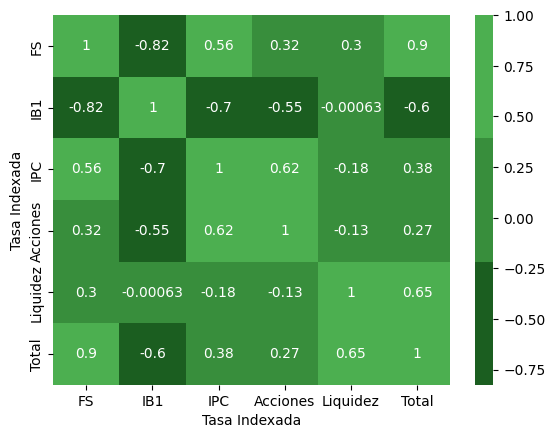

In [ ]:
colors = ['#1B5E20', '#388E3C', '#4CAF50']
cmap = ListedColormap(colors)
sns.heatmap(corr_matrix,cmap=cmap, annot=True)
plt.show()

In [ ]:
# Calcular la columna de porcentajes
porcentajes = Composicion.div(Composicion.iloc[:,-1], axis=0).iloc[:,:-1]
porcentajes.columns = [str(col) for col in porcentajes.columns]
# Agregar la columna de porcentajes al DataFrame
Composicion= pd.concat([Composicion, porcentajes], axis=0)

In [ ]:
Composicion = Composicion.drop("Total", axis=1)
Composicion.tail()

,FS,IB1,IPC,Acciones,Liquidez
Fecha,,,,,
2023-06-22,0.455761,0.102826,0.260600,0.163661,0.017151
2023-06-23,0.456566,0.102910,0.260710,0.162650,0.017164
2023-06-24,0.456523,0.102910,0.260715,0.162696,0.017157
2023-06-25,0.456479,0.102909,0.260719,0.162744,0.017149
2023-06-26,0.455842,0.102948,0.261089,0.163700,0.016421


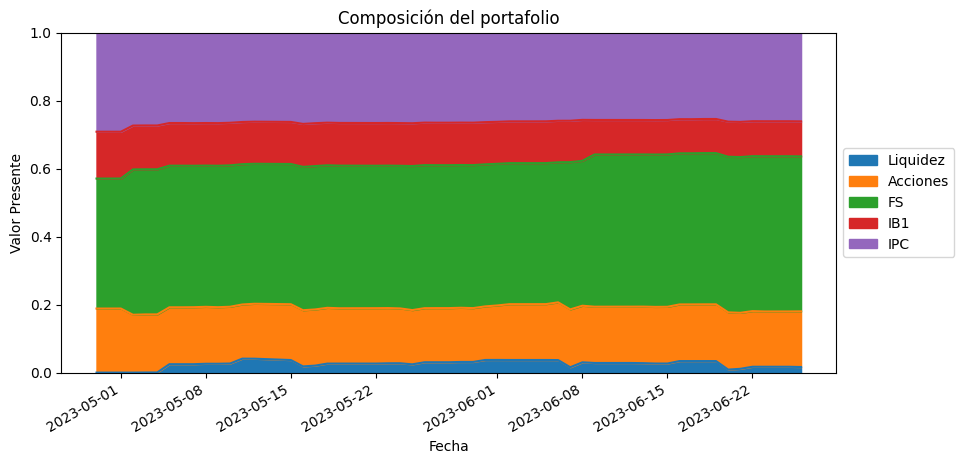

In [174]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='area', stacked=True, figsize=(10, 5), legend=True, ylim=[0, 1], y=['Liquidez','Acciones',"FS","IB1","IPC"])

# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')

# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

<ipython-input-188-6deac0024bd2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


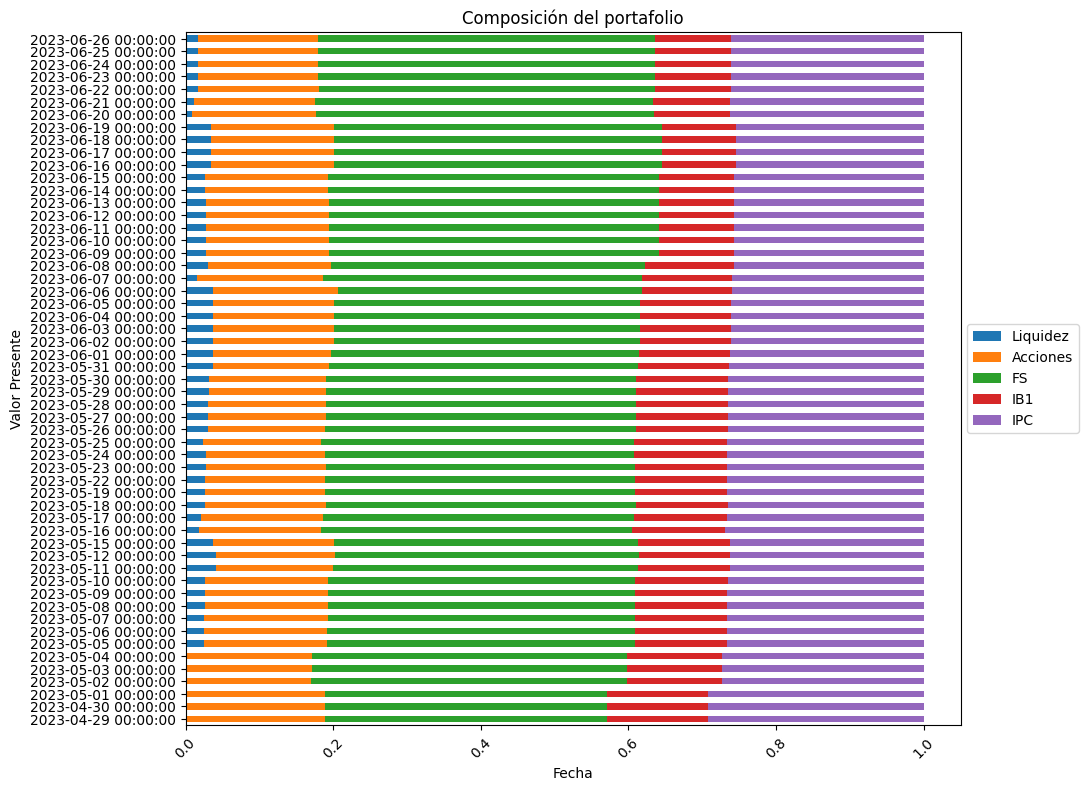

In [188]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='barh', stacked=True, figsize=(10, 9), legend=True, ylim=[0, 1], y=['Liquidez','Acciones',"FS","IB1","IPC"])
# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()